# Modelo Básico

In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
from Helper_functions import plot_images,plot_example_errors,plot_weights,print_confusion_matrix

## Importar dados

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("data/MNIST/", one_hot=True)

print("\nQuantidade de dados: ( Treinamento: %i , Teste: %i , Validação %i )" % ( \
          len(data.train.labels), \
          len(data.test.labels), \
          len(data.validation.labels)))

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting data/MNIST/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz

Quantidade de dados: ( Treinamento: 55000 , Teste: 10000 , Validação 5000 )


### One-Hot encoding

In [3]:
data.test.labels[0:5, :]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

### Dimensão dos dados

In [4]:
# Dimensão da imagem MNIST:  28 pixels em cada dimensão.
img_size = 28

# Imagens são armazenadas em um array de 1 dimensão.
n_inputs = img_size * img_size

# Número de classes, uma classe para cada um dos 10 digitos.
n_classes = 10

### Visualizar alguns dados

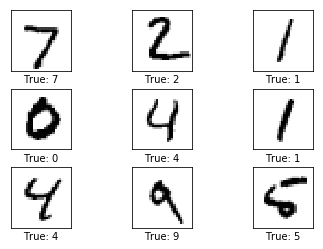

In [5]:
plot_images(data.test.images,data.test.labels)

## Tensorflow Graph

### Variaveis Placeholder

In [6]:
from GraphVisualization import show_graph, reset_graph
reset_graph()

In [7]:
x = tf.placeholder(tf.float32, [None, n_inputs], name='x')
y = tf.placeholder(tf.float32, [None, n_classes], name='y')

### Modelo

In [8]:
with tf.name_scope('Modelo') as scope:
    # Variaveis a ser otimizadas
    weights = tf.Variable(tf.zeros([n_inputs, n_classes]), name='weights')
    biases = tf.Variable(tf.zeros([n_classes]), name='biases')
    
    # Modelo
    logits = tf.matmul(x , weights) + biases
    pred = tf.nn.softmax(logits)
    
show_graph(tf.get_default_graph().as_graph_def())

### Otimização da Função de Custo

In [9]:
with tf.name_scope('cost') as scope:
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y)
    cost = tf.reduce_mean(cross_entropy)

### Método de otimização

In [10]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

In [11]:
show_graph(tf.get_default_graph().as_graph_def())

## Medidas de desempenho

In [12]:
with tf.name_scope('accuracy') as scope:
    correct_prediction = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [13]:
show_graph(tf.get_default_graph().as_graph_def())

## Tensorflow Run

### Criando uma session TensorFlow

In [14]:
session = tf.Session()

### Inicialização de variaveis

In [15]:
session.run(tf.global_variables_initializer())

In [16]:
batch_size = 100

def optimize(num_iterations):
    for i in range(num_iterations):
        x_batch, y_batch = data.train.next_batch(batch_size)
        
        feed_dict_train = {x: x_batch, y: y_batch}
        
        session.run(optimizer, feed_dict=feed_dict_train)

In [17]:
feed_dict_test = {x: data.test.images,
                  y: data.test.labels}

def print_accuracy():
    acc = session.run(accuracy, feed_dict=feed_dict_test)
    
    print("Accuracy on test-set: {0:.1%}".format(acc))

Ajuda para mostrar os resultados:

In [18]:
def show_example_errors():
    plot_example_errors(data, session, correct_prediction, pred , feed_dict_test)

def show_weights():
    plot_weights(weights, session)

def show_confusion_matrix():
    print_confusion_matrix(data, session, pred, feed_dict_test,n_classes)

Visualizamos o desempenho da rede antes de otimizar:

In [19]:
print_accuracy()

Accuracy on test-set: 9.8%


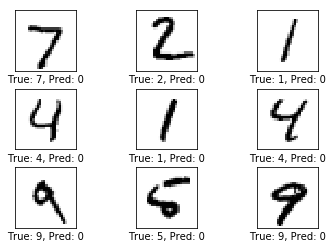

In [20]:
show_example_errors()

### Desempenho depois de 1 iteração da otimização

In [21]:
optimize(num_iterations=1)

In [22]:
print_accuracy()

Accuracy on test-set: 40.7%


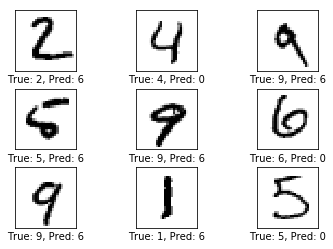

In [23]:
show_example_errors()

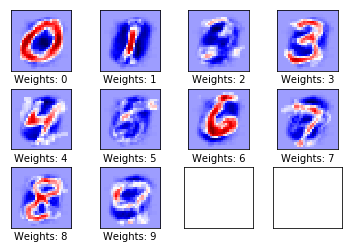

In [24]:
show_weights()

### Desempenho depois de 10 iterações

In [25]:
optimize(num_iterations=9)

In [26]:
print_accuracy()

Accuracy on test-set: 78.2%


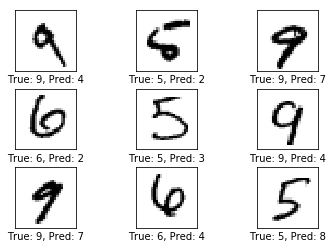

In [27]:
show_example_errors()

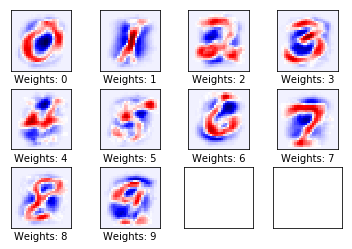

In [28]:
show_weights()

### Desempenho depois de 1000 iterações

In [29]:
optimize(num_iterations=990)

In [30]:
print_accuracy()

Accuracy on test-set: 91.7%


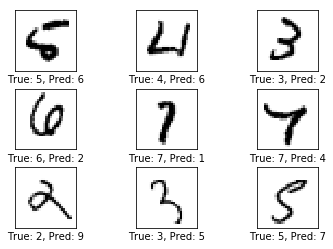

In [31]:
show_example_errors()

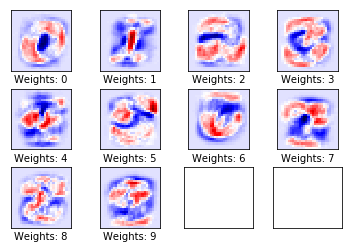

In [32]:
show_weights()

[[ 947    0    3    2    0   16    6    4    2    0]
 [   0 1110    2    2    0    2    4    2   13    0]
 [   4    7  952   10    9    4    8   10   22    6]
 [   2    1   27  893    0   42    1   14   18   12]
 [   1    3   13    0  882    0    7    2    7   67]
 [   8    4   10   25    8  784   10    8   27    8]
 [  11    3   13    2   10   21  891    2    5    0]
 [   1   11   29    4    5    1    0  934    1   42]
 [   4   12   13   17    8   33    8   11  854   14]
 [   7    9    2    8   21   13    0   17    5  927]]


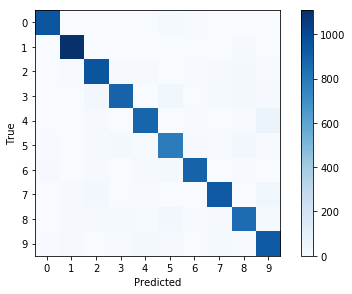

In [33]:
show_confusion_matrix()